# Linear Models

## Gradient Descent

Gradient decent is a generic optimization algotithm capable of finding optimal solutions to a wide range of problems. 
- The general idea of GD is to tweak parameters iteratively in order to minimize a cost function
    - Example of costs function: MSE, log_loss, etc.

Not all costs functions look like nice, regular bowls. Fortnately, the MSE cost function for a linear regression happens to be a convex function, impliyng that there are no local minima, just one global minimum.

- Just in this case, GD is guaranteed to approach closely to the global minimum (if you wait long enough and if the learning rate is not too high)

When using a GD, you should ensure that all features have a similar scale (e.g. StandarScaler)

### Batch Gardient Descent

To implement GD, you need to compute the gradient of the cost function (e.g. RMS) with regard to each model parameter θ. --> Partial derivatives, how much the cost function will change if you change θ. 

For multiple parameters --> gradient vector (vector with all partial derivatives)

Batch GD implies using the full training set X, to calculate the gradient vector, which mught be slow on a very large training set

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn.preprocessing import add_dummy_feature

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

X_b = add_dummy_feature(X) 

In [2]:
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)  # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

The trained model parameters:

In [3]:
theta

array([[4.21509616],
       [2.77011339]])

We need to find a good learning rate but also set a good number of epochs

Example of different learning rates

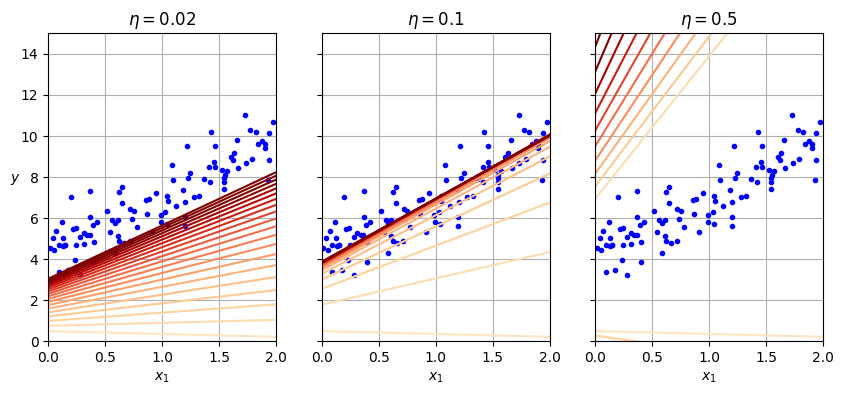

In [26]:
import matplotlib as mpl

X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new) 

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)

plt.show()

n = 0.1 looks pretty good, in just a few epochs, it has already converged to the solution

We could use GridSearch for finding a good learning rate. Limit the number of epochs so that grid serach can eliminate models that take too long to converge

### Stochastic Gradient Descent

The main problem to Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step

SGD picks a random instance in the training set at every ste and computes the gradients based only on that instance, which makes it much faster

- Randomness --> instead of gently decreasing to reach the minimum, the cost function will bounce up and down, decreasing only on average. Thus, the final parameters will be good but not optimal.
- One solution to this dilema is to gradually reduce the learning rate

For gradually reducing the learning rate we can create a learning schedule function:

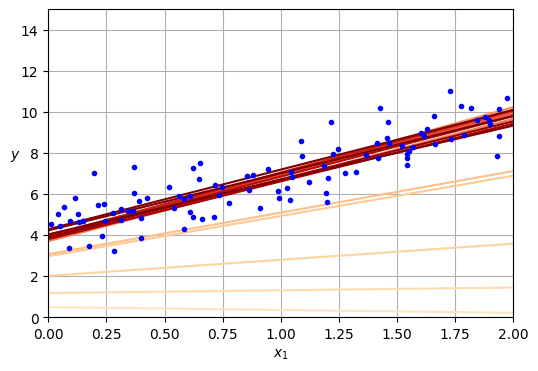

In [27]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new) 

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

n_shown = 20  # extra code – just needed to generate the figure below
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting

for epoch in range(n_epochs):
    for iteration in range(m):

        # extra code – these 4 lines are used to generate the figure
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        


plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()

plt.show()

In [28]:
theta

array([[4.21076011],
       [2.74856079]])

In [32]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [33]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

## Logistic Regression

Logistic regression can be used for classification. 

- It is commonly used to estiamte the probability that an instance belongs to a particular class.
- If the estimated probability is grater than a given threshold (typically 50%), then the model predicts that the instance belongs to that class

### Estimating Probabilities

Logistic Functiion = σ(t) = 1 / 1 + e ^(-t)

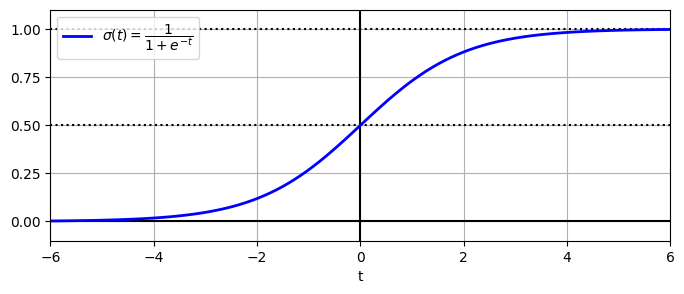

In [5]:
lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(8, 3))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], "k:")
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()

plt.show()

p̂ = ho (x) = σ (θ^T x) ;  p̂ ∈ [0, 1]

- y_hat = 0 (negative class) if  p̂ < 0.5
- y_hat = 1 (positive class) if  p̂ > 0.5

### Training and Cost Function

Training: the objetive is to set the parameter vector θ so that the model estiamtes high probabilities for positive instances (y = 1) and low probabilities for negative instances (y = 0).

- This idea is capture by the cost function:
    - c(θ) = -log (p̂) if y=1
    - c(θ) = -log (1 - p̂) if y = 0

    - This translates into the cost beeing large if the model estimates a probability close to 1 for a negative instance, and close to 0 for a positive instance
    - The cost will be close to 0 otherwise, which is what we want

The cost function (log loss) over the whole training set is the average cost over all training instances.
- When using a log loss, we are assuming that the instances follow a Gaussian distribution around the mean of their class!!! if otherwise, the model can be biased

### Decision Boundaries

In [6]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [7]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [8]:
iris.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int64

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Let's split the data and train a logisstic regression model on the tranning set

- Logistic regression is used as a binary classifer, positive class = virginica; negative class = otherwise

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

Let's look at the model's estimated probabilities for flowers with petal widths varying from 0 to 3 cm

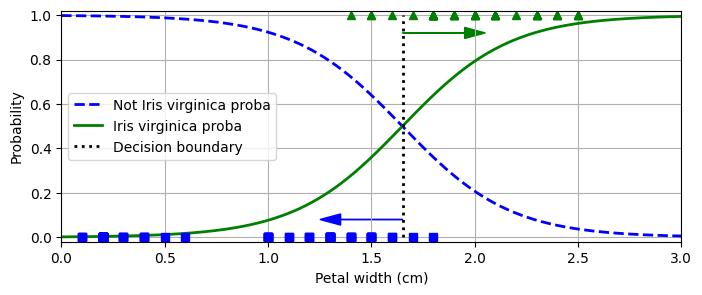

In [11]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")


plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()

plt.show()

In [12]:
decision_boundary

1.6516516516516517

There is a decision boundary at around 1.6 cm where bouth probabilities are equal to 50%. We can see by using predict() instead of predict_proba, which will return the most likely class.

In [13]:
log_reg.predict([[1.66], [1.64]])

array([ True, False])

Let's now display two features: petal width and lenght

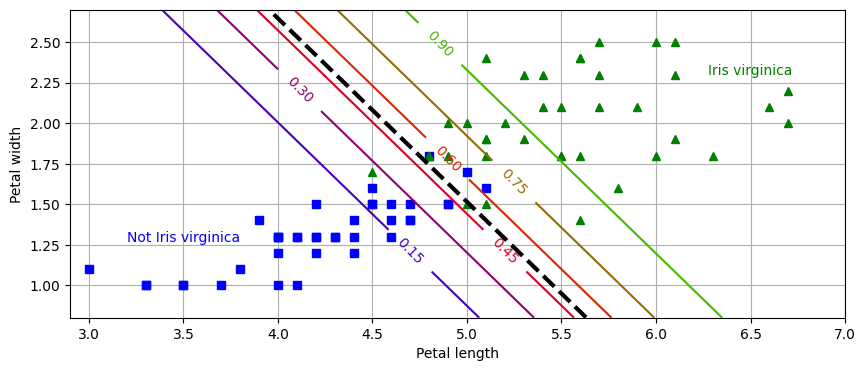

In [14]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

# for the contour plot
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]  # one instance per point on the figure
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

# for the decision boundary
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()

plt.show()

The dashed line represents the points where the model estimates 50% probability 
 - 50% is the model decision boundary

### SGD on Logistic Regression

In [47]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

# We create the logistic regression classifier using SGD; log_loss for logistic regression and penalty='l2' for regularization
sgd_clf = SGDClassifier(loss='log_loss', penalty='l2', max_iter=1000, tol=1e-5, eta0=0.01, n_iter_no_change=100, random_state=42)

# Accuracy on cross validation
scores = cross_val_score(sgd_clf, X_train, y_train, cv=10, scoring='accuracy')

np.mean(scores)


0.9454545454545453

Adjusting the learning rate "eta" with GridSearch and RandomizedSearch (Chapter 2)

In [48]:
from sklearn.model_selection import RandomizedSearchCV

sgd_clf = SGDClassifier(loss='log_loss', penalty='l2', max_iter=1000, tol=1e-5,
                        n_iter_no_change=100, random_state=42)

param_dist = {
    'eta0': np.logspace(-5, 0, 20)  # Test values from 1e-5 to 1
}

random_search = RandomizedSearchCV(sgd_clf, param_distributions=param_dist, 
                                   n_iter=10, cv=10, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

print(f"Best eta0: {random_search.best_params_['eta0']}")
print(f"Best accuracy: {random_search.best_score_:.4f}")

Best eta0: 1e-05
Best accuracy: 0.9455


In [49]:
from sklearn.model_selection import GridSearchCV

sgd_clf = SGDClassifier(loss='log_loss', penalty='l2', max_iter=1000, tol=1e-5,
                        n_iter_no_change=100, random_state=42)


param_grid = {
    'eta0': [0.0001, 0.001, 0.01, 0.1, 1]  # Different learning rates to test
}


grid_search = GridSearchCV(sgd_clf, param_grid, cv=10, scoring='accuracy')

grid_search.fit(X_train, y_train)

print(f"Best eta0: {grid_search.best_params_['eta0']}")
print(f"Best accuracy: {grid_search.best_score_:.4f}")


Best eta0: 0.0001
Best accuracy: 0.9455


In [41]:
grid_search.best_estimator_

SGDClassifier(eta0=0.0001, loss='log_loss', n_iter_no_change=100,
              random_state=42, tol=1e-05)